### 项目概述
基于经验、年龄、性别、职称和教育水平的薪资数据

### 项目目的
1. 确定不同人口统计数据的薪酬趋势
2. 分析不同行业和工作角色的性别薪酬差距
3. 研究教育水平如何影响薪资

### 数据清洗（载入、去重、处理缺失值、格式调整、异常值处理）

In [119]:
# 导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 载入数据
data = pd.read_csv('Salary_Data.csv')
print(f"Dataset shape: {data.shape}") # 查看data的形状
data.head()

Dataset shape: (6704, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [121]:
# 处理重复值
data.drop_duplicates(keep='first',inplace=True) 
# 'first' 表示保留第一次出现的重复行,还有'last'（保留最后一次出现的行）和 False（删除所有重复行）。
# inplace=True: 表示直接在原 DataFrame 上进行修改，而不是返回一个新的 DataFrame。
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1791 non-null   float64
 1   Gender               1791 non-null   object 
 2   Education Level      1790 non-null   object 
 3   Job Title            1791 non-null   object 
 4   Years of Experience  1790 non-null   float64
 5   Salary               1788 non-null   float64
dtypes: float64(3), object(3)
memory usage: 98.0+ KB


In [123]:
# 检查缺失值
missing_values = data.isnull().sum()
print("每列缺失值数量：")
print(missing_values)

# 处理缺失值，删除含有缺失值的行
data = data.dropna()

每列缺失值数量：
Age                    1
Gender                 1
Education Level        2
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [125]:
print("每列缺失值数量：")
missing_values = data.isnull().sum()
print(missing_values)

每列缺失值数量：
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


#### 必要时还需进行格式处理（例如单位换算，数据类型的转换等等）

In [127]:
print("\n基本统计信息：")
data.describe().round(2)


基本统计信息：


,Age,Years of Experience,Salary
count,1787.00,1787.00,1787.00
mean,35.14,9.16,113184.66
std,8.21,6.84,51596.54
min,21.00,0.00,350.00
25%,29.00,3.00,70000.00
50%,33.00,8.00,110000.00
75%,41.00,13.00,160000.00
max,62.00,34.00,250000.00


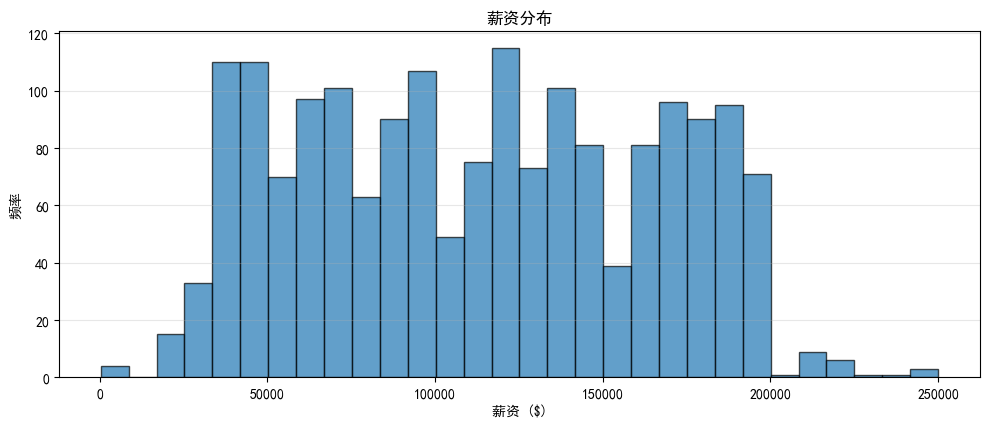

,count,mean,std,min,25%,50%,75%,max
Salary,1787.0,113184.659765,51596.536766,350.0,70000.0,110000.0,160000.0,250000.0


In [143]:
# 整体薪资分布
plt.figure(figsize=(10, 8))  # 设置图形大小为12x8英寸

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 子图1：薪资分布直方图
plt.subplot(2, 1, 1)  # 创建2行1列的子图布局中的第一个子图
plt.hist(data['Salary'], bins=30, alpha=0.7, edgecolor='black')  # 绘制薪资分布的直方图
plt.title('薪资分布')  # 设置子图标题为“薪资分布”
plt.xlabel('薪资 ($)')  # 设置X轴标签为“薪资 ($)"
plt.ylabel('频率')  # 设置Y轴标签为“频率”
plt.grid(axis='y', alpha=0.3) #添加透明的为 0.3 的 Y轴网格线
plt.tight_layout()  # 自动调整子图参数，以适应图形区域
plt.show()  # 显示图形

# 薪资的基本统计信息
salary_stats = data['Salary'].describe().to_frame().T  # 获取薪资列的基本统计信息，并将其转换为DataFrame
salary_stats  # 显示薪资的基本统计信息

#### 确定不同人口统计数据的薪酬趋势

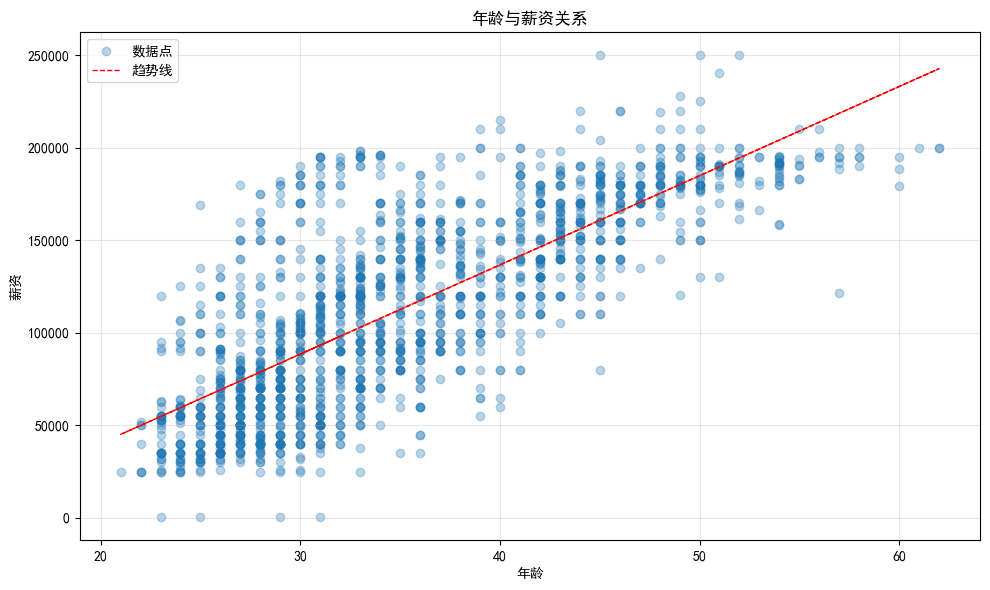

In [131]:
# 1.1 年龄与薪资的关系（散点图+回归线）
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Salary'], alpha=0.3, label='数据点')

# 添加回归线
z = np.polyfit(data['Age'], data['Salary'], 1)
p = np.poly1d(z)
plt.plot(data['Age'], p(data['Age']), 'r--', linewidth=1, label='趋势线')
# 知识点：np.polyfit()用于线性回归，np.poly1d()创建多项式函数

plt.title('年龄与薪资关系')
plt.xlabel('年龄')
plt.ylabel('薪资')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


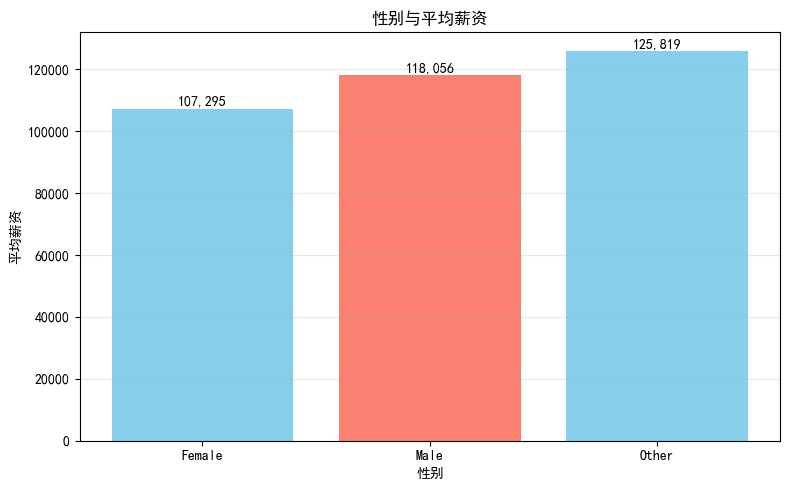

In [164]:

# 1.2 性别与薪资关系（分组条形图）
gender_salary = data.groupby('Gender')['Salary'].mean().reset_index()

plt.figure(figsize=(8, 5))
x = np.arange(len(gender_salary))
plt.bar(x, gender_salary['Salary'], color=['skyblue', 'salmon'])

plt.title('性别与平均薪资')
plt.xlabel('性别')
plt.ylabel('平均薪资')
plt.xticks(x, gender_salary['Gender'])
plt.grid(axis='y', alpha=0.3)

# 添加数值标签
for i, v in enumerate(gender_salary['Salary']): # i代表索引，v代表值，
    plt.text(i, v + 1000, f'{v:,.0f}', ha='center') # x为 i，y为 v+1000，居中。

plt.tight_layout()
plt.show()

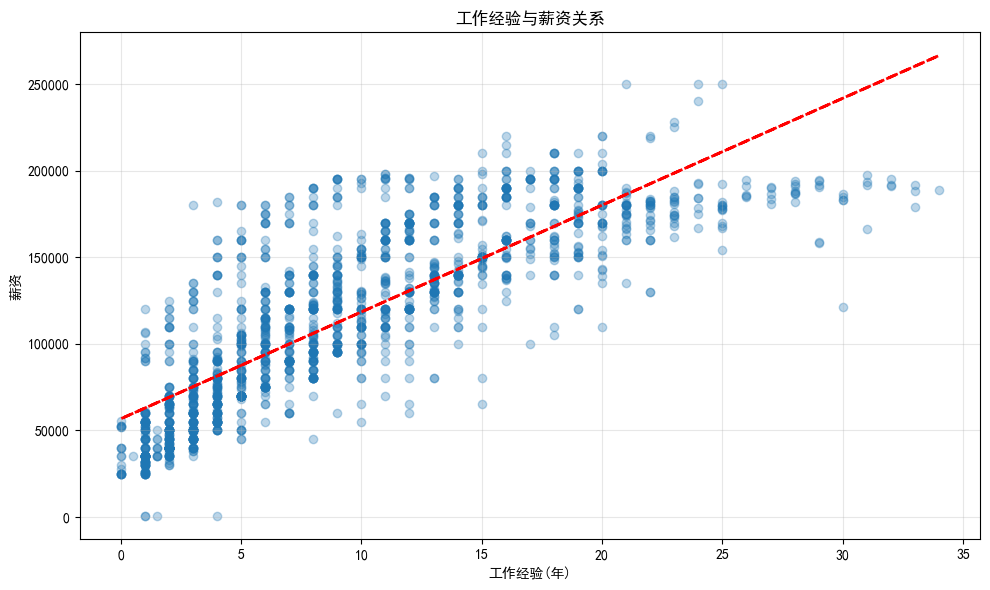

In [151]:
# 1.3 工作经验与薪资关系（带趋势线的散点图）
plt.figure(figsize=(10, 6))
plt.scatter(data['Years of Experience'], data['Salary'], alpha=0.3)

# 添加回归线
z = np.polyfit(data['Years of Experience'], data['Salary'], 1)
p = np.poly1d(z)
plt.plot(data['Years of Experience'], p(data['Years of Experience']), 'r--', linewidth=2)

plt.title('工作经验与薪资关系')
plt.xlabel('工作经验(年)')
plt.ylabel('薪资')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


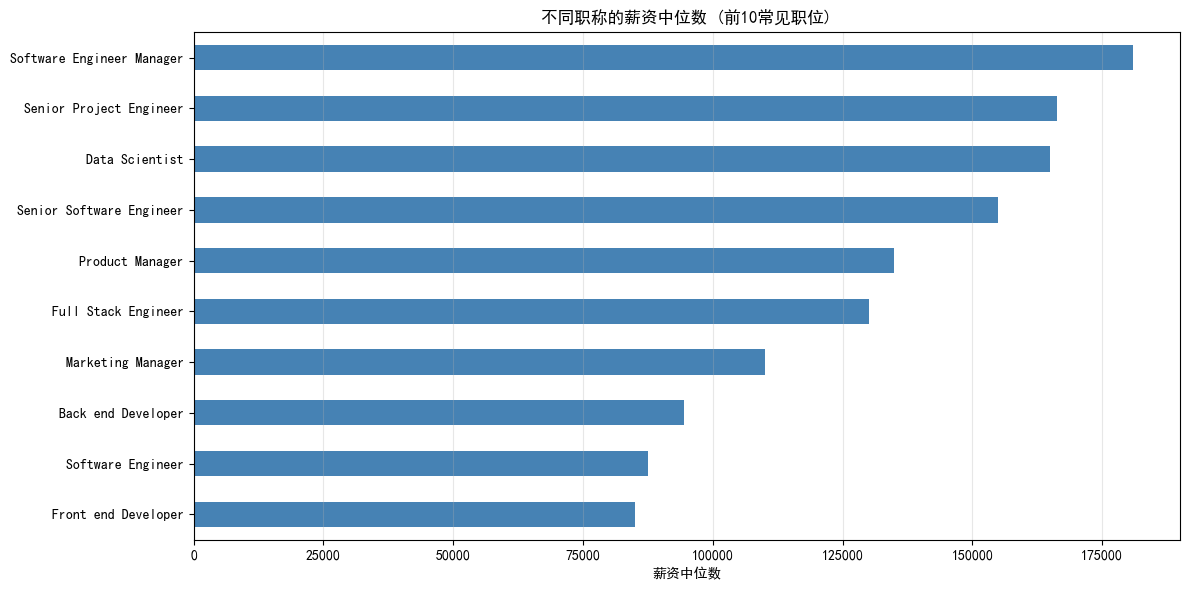

In [66]:
# 1.4 职称与薪资关系（前10常见职位）
top_jobs = data['Job Title'].value_counts().head(10).index
top_jobs_data = data[data['Job Title'].isin(top_jobs)]

# 按职位分组计算薪资中位数
job_salary = top_jobs_data.groupby('Job Title')['Salary'].median().sort_values()

plt.figure(figsize=(12, 6))
# job_salary.plot(color='steelblue')
job_salary.plot(kind='barh', color='steelblue')  # 水平条形图更易阅读长名称

plt.title('不同职称的薪资中位数 (前10常见职位)')
plt.xlabel('薪资中位数')
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 知识点：value_counts()用于计数，groupby().median()计算中位数

#### 分析不同行业和工作角色的性别薪酬差距

In [73]:
# 2.1 创建工作经验分组
data['Exp_Group'] = pd.cut(data['Years of Experience'], 
                          bins=[0, 5, 10, 15, 20, 30],
                          labels=['0-5年', '5-10年', '10-15年', '15-20年', '20+年'])
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Exp_Group
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0-5年
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0-5年
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,10-15年
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,5-10年
4,52.0,Male,Master's,Director,20.0,200000.0,15-20年


In [79]:
# 2.2 不同经验组的性别薪资差异
exp_gender = data.groupby(['Exp_Group', 'Gender'])['Salary'].mean().unstack()
exp_gender

C:\Users\朱捷登\AppData\Local\Temp\ipykernel_17472\2718311433.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_gender = data.groupby(['Exp_Group', 'Gender'])['Salary'].mean().unstack()


Gender,Female,Male,Other
Exp_Group,,,
0-5年,64203.669753,65990.708709,65942.0
5-10年,113757.000000,117623.307087,104127.0
10-15年,143262.573248,151084.120482,161393.0
15-20年,170268.838235,173807.261194,NaN
20+年,174979.282609,185605.352113,158610.0


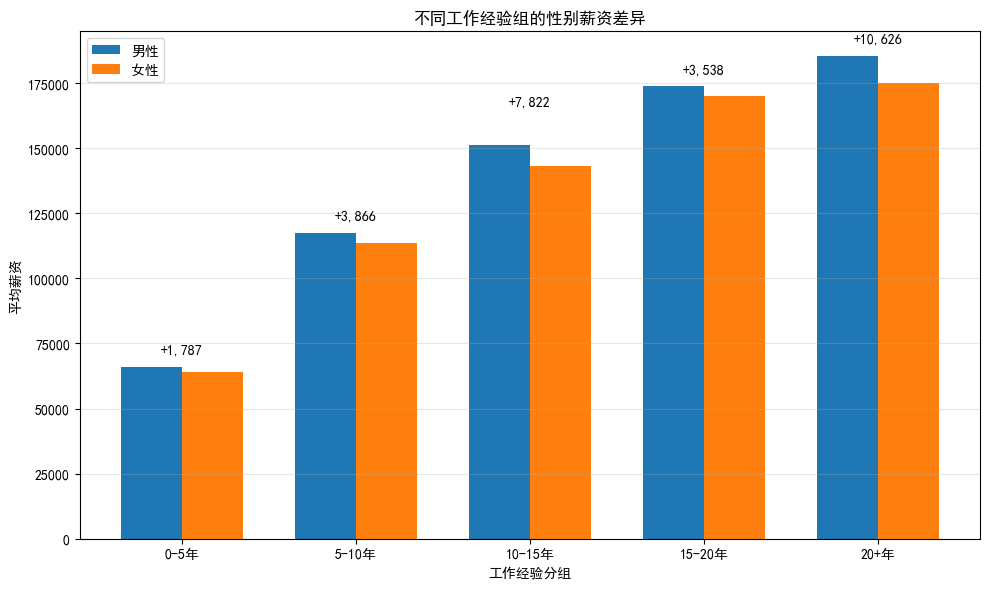

In [95]:
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(exp_gender))

# 绘制男性和女性的条形图
plt.bar(x - width/2, exp_gender['Male'], width, label='男性')
plt.bar(x + width/2, exp_gender['Female'], width, label='女性')

plt.title('不同工作经验组的性别薪资差异')
plt.xlabel('工作经验分组')
plt.ylabel('平均薪资')
plt.xticks(x, exp_gender.index) # 设置X轴的刻度标签。
plt.legend() # 添加图例。
plt.grid(axis='y', alpha=0.3) 

# 添加差异标签
for i in range(len(exp_gender)):
    gap = exp_gender['Male'].iloc[i] - exp_gender['Female'].iloc[i]
    plt.text(i, max(exp_gender.iloc[i]) + 5000, f'+{gap:,.0f}', ha='center')

plt.tight_layout()
plt.show()

# 知识点：pd.cut()用于分箱，groupby().mean().unstack()创建透视表

#### 研究教育水平如何影响薪资

C:\Users\朱捷登\AppData\Local\Temp\ipykernel_17472\347724666.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(edu_data, labels=education_order)


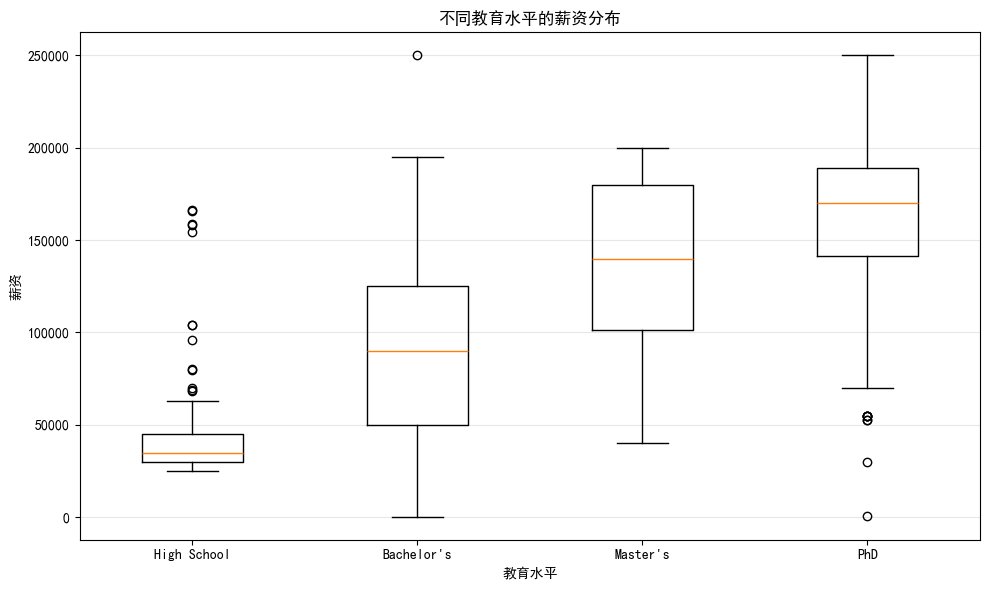

In [156]:
# 3.1 教育水平与薪资（箱线图）
education_order = ["High School", "Bachelor's", "Master's", "PhD"]
data_edu = data[data['Education Level'].isin(education_order)]

# 准备箱线图数据
edu_data = [data_edu[data_edu['Education Level'] == level]['Salary'] 
            for level in education_order]

plt.figure(figsize=(10, 6))
plt.boxplot(edu_data, labels=education_order)

plt.title('不同教育水平的薪资分布')
plt.xlabel('教育水平')
plt.ylabel('薪资')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

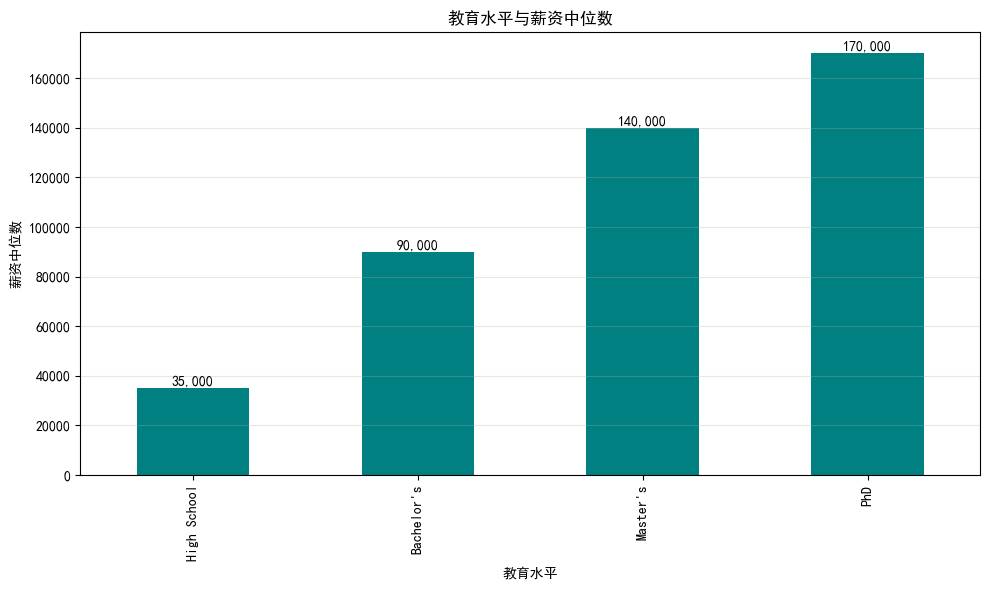

In [160]:
# 3.2 教育水平与工作经验对薪资的综合影响
education_salary = data_edu.groupby('Education Level')['Salary'].median()

plt.figure(figsize=(10, 6))
education_salary.loc[education_order].plot(kind='bar', color='teal')

plt.title('教育水平与薪资中位数')
plt.xlabel('教育水平')
plt.ylabel('薪资中位数')
plt.grid(axis='y', alpha=0.3)

# 添加数值标签
for i, v in enumerate(education_salary.loc[education_order]):
    plt.text(i, v + 1000, f'{v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

### 总结分析

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   float64
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


In [236]:
print('数据集中的平均工资约为 113184.7，中位数为 110000.0。')

数据集中的平均工资约为 113184.7，中位数为 110000.0。


In [230]:
Male_salary=data[data['Gender']=='Male']['Salary'].mean()
Female_salary=data[data['Gender']=='Female']['Salary'].mean()
a=Male_salary/Female_salary
print(f'男性工资平均是女性工资的{a:.2f}倍')

男性工资平均是女性工资的1.10倍


In [240]:
print('较高的教育水平与较高的工资密切相关。')

较高的教育水平与较高的工资密切相关。
